In [76]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '901b0884-d029-42f2-a144-bdd4710cf0b5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-06-08T11:51:51.542Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10027}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [77]:
import pandas as pd

In [133]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19061668.00000,19061668.00000,NaN,1,NaN,NaN,2022-06-08T11:51:00.000Z,30441.55553,40055947030.73607,12.70190,0.18040,3.13142,-3.35039,-7.62872,-28.35740,-22.17349,580266824914.60278,46.50950,639272666127.98999,2022-06-08T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 12:15:49.287247
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121094068.56150,121094068.56150,NaN,2,NaN,NaN,2022-06-08T11:50:00.000Z,1807.99389,21973171590.92739,8.94670,0.13566,3.12630,-6.33387,-24.37593,-43.71088,-30.34153,218937336679.81369,17.54750,218937336679.81000,2022-06-08T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 12:15:49.287247
2,825,Tether,USDT,tether,34444,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72420549552.67801,79713622660.21223,NaN,3,NaN,NaN,2022-06-08T11:50:00.000Z,0.99948,66579684595.18506,14.93180,0.00320,0.00811,0.01145,-0.05014,-0.07859,-0.10186,72382597002.56960,5.80080,79671848118.63000,2022-06-08T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 12:15:49.287247
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53838775184.62985,53838775184.62985,NaN,4,NaN,NaN,2022-06-08T11:50:00.000Z,1.00001,5543602534.69967,10.17810,-0.04841,-0.01573,-0.01626,0.00742,0.04484,0.07437,53839527524.70329,4.31470,53839527524.70000,2022-06-08T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 12:15:49.287247
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-08T11:50:00.000Z,291.40795,1489057074.44232,-16.28040,0.42298,5.33869,-7.73444,-11.95452,-31.80917,-22.64217,47580208163.83521,3.81220,48116336243.62000,2022-06-08T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 12:15:49.287247
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,2022-06-08T11:50:00.000Z,0.64573,1770740207.29822,53.07530,1.41699,10.56985,6.96429,-2.76908,-37.77896,-19.93402,21912383629.41068,1.75610,29058049647.89000,2022-06-08T11:50:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 12:15:49.287247
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-08T11:51:00.000Z,0.39903,1521984236.76469,11.76640,0.00057,2.51333,-3.90998,-25.35083,-47.71480,-45.64869,19290524428.05496,1.54620,39903365631.11000,2022-06-08T11:51:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 12:15:49.287247
7,4687,Binance USD,BUSD,binance-usd,3815,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,18013276339.46925,18013276339.46925,NaN,8,NaN,NaN,2022-06-08T11:50:00.000Z,1.00076,6693939627.08375,28.44970,-0.01807,-0.03561,0.11391,0.03329,0.04888,-0.00394,18026880888.55074,1.44430,18026880888.55000,2022-06-08T11:50:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-08 12:

In [6]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9525,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906128e+07,1.906128e+07,...,-23.783485,5.939127e+11,46.8903,6.543195e+11,2022-06-08T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5742,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210901e+08,1.210901e+08,...,-31.454742,2.216210e+11,17.4973,2.216210e+11,2022-06-08T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34413,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,...,-0.104158,7.237404e+10,5.7153,7.966243e+10,2022-06-08T02:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4313,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384272e+10,5.384272e+10,...,-0.008200,5.385698e+10,4.2530,5.385698e+10,2022-06-08T02:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,...,-24.584494,4.772500e+10,3.7700,4.826276e+10,2022-06-08T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,...,-22.091680,2.175046e+10,1.7176,2.901005e+10,2022-06-08T02:40:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,...,-46.244902,1.971188e+10,1.5566,4.077497e+10,2022-06-08T02:41:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,...,0.184721,1.804727e+10,1.4249,1.804727e+10,2022-06-08T02:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e+08,...,-53.223457,1.371032e+10,1.0830,2.060347e+10,2022-06-08T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Dogecoin,DOGE,dogecoin,483,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,-31.990472,1.078532e+10,0.8515,1.078532e+10,2022-06-08T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN


In [19]:
df.to_csv('API.csv')

In [131]:
df['Timestamp']=pd.to_datetime('now')

In [132]:

df = pd.json_normalize(data['data'])
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19061668.00000,19061668.00000,NaN,1,NaN,NaN,2022-06-08T11:51:00.000Z,30441.55553,40055947030.73607,12.70190,0.18040,3.13142,-3.35039,-7.62872,-28.35740,-22.17349,580266824914.60278,46.50950,639272666127.98999,2022-06-08T11:51:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121094068.56150,121094068.56150,NaN,2,NaN,NaN,2022-06-08T11:50:00.000Z,1807.99389,21973171590.92739,8.94670,0.13566,3.12630,-6.33387,-24.37593,-43.71088,-30.34153,218937336679.81369,17.54750,218937336679.81000,2022-06-08T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34444,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72420549552.67801,79713622660.21223,NaN,3,NaN,NaN,2022-06-08T11:50:00.000Z,0.99948,66579684595.18506,14.93180,0.00320,0.00811,0.01145,-0.05014,-0.07859,-0.10186,72382597002.56960,5.80080,79671848118.63000,2022-06-08T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4320,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53838775184.62985,53838775184.62985,NaN,4,NaN,NaN,2022-06-08T11:50:00.000Z,1.00001,5543602534.69967,10.17810,-0.04841,-0.01573,-0.01626,0.00742,0.04484,0.07437,53839527524.70329,4.31470,53839527524.70000,2022-06-08T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-08T11:50:00.000Z,291.40795,1489057074.44232,-16.28040,0.42298,5.33869,-7.73444,-11.95452,-31.80917,-22.64217,47580208163.83521,3.81220,48116336243.62000,2022-06-08T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,6,NaN,NaN,2022-06-08T11:50:00.000Z,0.64573,1770740207.29822,53.07530,1.41699,10.56985,6.96429,-2.76908,-37.77896,-19.93402,21912383629.41068,1.75610,29058049647.89000,2022-06-08T11:50:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-08T11:51:00.000Z,0.39903,1521984236.76469,11.76640,0.00057,2.51333,-3.90998,-25.35083,-47.71480,-45.64869,19290524428.05496,1.54620,39903365631.11000,2022-06-08T11:51:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe
7,4687,Binance USD,BUSD,binance-usd,3815,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,18013276339.46925,18013276339.46925,NaN,8,NaN,NaN,2022-06-08T11:50:00.000Z,1.00076,6693939627.08375,28.44970,-0.01807,-0.03561,0.11391,0.03329,0.04888,-0.00394,18026880888.55074,1.44430,18026880888.55000,2022-06-08T11:50:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,340448865.84542,511616946.14229,NaN,9,NaN,NaN,2022-06-08T11:50:00.000Z,39.43975,1605599834.79551,-17.08

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [138]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '901b0884-d029-42f2-a144-bdd4710cf0b5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df = df.append(df2)
#     if not os.path.isfile(r'E:\API\API.csv'):
#         df.to_csv(r'E:\API\API.csv', header='column_names')
#     else:
#         df.to_csv(r'E:\API\API.csv', mode='a', header=False) 


In [139]:
import os
from time import time
from time import sleep


In [140]:
for i in range(30):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()


API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9525,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906128e+07,1.906128e+07,NaN,1,NaN,NaN,2022-06-08T03:02:00.000Z,31001.635777,3.679880e+10,2.9984,-0.320111,5.469614,-2.511839,-7.384058,-26.599336,-23.960292,5.909309e+11,46.7946,6.510344e+11,2022-06-08T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
1,1027,Ethereum,ETH,ethereum,5742,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210901e+08,1.210901e+08,NaN,2,NaN,NaN,2022-06-08T03:01:00.000Z,1823.783118,2.066819e+10,1.8218,0.261358,4.896391,-5.975423,-25.237681,-42.837474,-31.543141,2.208420e+11,17.4880,2.208420e+11,2022-06-08T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
2,825,Tether,USDT,tether,34413,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T03:02:00.000Z,0.999349,6.119203e+10,4.1583,-0.008127,0.008896,0.001713,-0.048597,-0.103447,-0.101106,7.237341e+10,5.7317,7.966173e+10,2022-06-08T03:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 03:03:10.083716,NaT
3,3408,USD Coin,USDC,usd-coin,4313,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384272e+10,5.384272e+10,NaN,4,NaN,NaN,2022-06-08T03:01:00.000Z,1.000199,5.312894e+09,6.6305,0.007536,-0.007443,0.007674,0.005780,0.102216,0.030251,5.385346e+10,4.2650,5.385346e+10,2022-06-08T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 03:03:10.083716,NaT
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T03:01:00.000Z,290.425949,1.606957e+09,0.4491,-0.500805,1.525024,-9.523088,-16.716052,-30.921037,-24.930450,4.741987e+10,3.7561,4.795419e+10,2022-06-08T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,6,NaN,NaN,2022-06-08T03:01:00.000Z,0.642658,1.508125e+09,0.0851,-0.923361,10.331130,5.170341,-10.153091,-37.351900,-22.184231,2.168266e+10,1.7172,2.891961e+10,2022-06-08T03:01:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 03:03:10.083716,NaT
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T03:02:00.000Z,0.405170,1.484933e+09,5.6654,-0.585414,4.893488,-3.497880,-27.894607,-46.462535,-46.443255,1.958719e+10,1.5512,4.051702e+10,2022-06-08T03:02:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 03:03:10.083716,NaT
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T03:02:00.000Z,1.001649,6.314555e+09,25.2913,0.180928,0.114896,0.175625,0.108115,0.255264,0.284990,1.804333e+10,1.4288,1.804333e+10,2022-06-08T03:02:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 03:03:10.083716,NaT
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404490e+08,5.116169e

In [141]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9525,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19061281.00000,19061281.00000,NaN,1,NaN,NaN,2022-06-08T03:02:00.000Z,31001.63578,36798798012.24739,2.99840,-0.32011,5.46961,-2.51184,-7.38406,-26.59934,-23.96029,590930891004.41321,46.79460,651034351316.30005,2022-06-08T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
1,1027,Ethereum,ETH,ethereum,5742,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121090051.12400,121090051.12400,NaN,2,NaN,NaN,2022-06-08T03:01:00.000Z,1823.78312,20668187040.27097,1.82180,0.26136,4.89639,-5.97542,-25.23768,-42.83747,-31.54314,220841991036.24054,17.48800,220841991036.23999,2022-06-08T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
2,825,Tether,USDT,tether,34413,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72420549552.67801,79713622660.21223,NaN,3,NaN,NaN,2022-06-08T03:02:00.000Z,0.99935,61192031267.86444,4.15830,-0.00813,0.00890,0.00171,-0.04860,-0.10345,-0.10111,72373406091.86551,5.73170,79661731642.13000,2022-06-08T03:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 03:03:10.083716,NaT
3,3408,USD Coin,USDC,usd-coin,4313,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53842722286.60191,53842722286.60191,NaN,4,NaN,NaN,2022-06-08T03:01:00.000Z,1.00020,5312894028.36000,6.63050,0.00754,-0.00744,0.00767,0.00578,0.10222,0.03025,53853461649.25928,4.26500,53853461649.26000,2022-06-08T03:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 03:03:10.083716,NaT
4,1839,BNB,BNB,bnb,942,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-08T03:01:00.000Z,290.42595,1606956870.61370,0.44910,-0.50080,1.52502,-9.52309,-16.71605,-30.92104,-24.93045,47419870372.52633,3.75610,47954191785.31000,2022-06-08T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 03:03:10.083716,NaT
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,6,NaN,NaN,2022-06-08T03:01:00.000Z,0.64266,1508124512.47901,0.08510,-0.92336,10.33113,5.17034,-10.15309,-37.35190,-22.18423,21682656230.83236,1.71720,28919609523.78000,2022-06-08T03:01:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 03:03:10.083716,NaT
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,2022-06-08T03:02:00.000Z,0.40517,1484933066.91560,5.66540,-0.58541,4.89349,-3.49788,-27.89461,-46.46253,-46.44325,19587185820.29422,1.55120,40517023805.48000,2022-06-08T03:02:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 03:03:10.083716,NaT
7,4687,Binance USD,BUSD,binance-usd,3813,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,18013622456.07925,18013622456.07925,NaN,8,NaN,NaN,2022-06-08T03:02:00.000Z,1.00165,6314555309.33257,25.29130,0.18093,0.11490,0.17562,0.10812,0.25526,0.28499,18043328137.61721,1.42880,18043328137.62000,2022-06-08T03:02:00.000Z,1839.00000,BNB

In [110]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16532,3.15791,-3.55700,-8.01882,-28.32703,-22.18323
Ethereum,0.20811,3.23340,-6.54771,-24.71111,-43.63842,-30.25991
Tether,-0.00418,0.00698,0.00476,-0.05366,-0.07887,-0.11035
USD Coin,0.00017,0.00309,0.00855,0.00108,0.00990,0.07760
BNB,0.27898,5.30633,-7.95303,-12.51736,-31.75778,-22.68400
Cardano,1.23025,10.56019,6.73641,-3.70854,-37.86324,-20.11223
XRP,0.05885,2.54140,-4.03045,-25.60358,-47.68237,-45.58426
Binance USD,0.08637,-0.08871,0.08512,-0.07970,0.20653,0.17121
Solana,0.26945,3.71638,-11.37812,-45.32259,-64.29104,-52.00910


In [111]:
df3=df2.stack()
df3

name                                         
Bitcoin          quote.USD.percent_change_1h      0.16532
                 quote.USD.percent_change_24h     3.15791
                 quote.USD.percent_change_7d     -3.55700
                 quote.USD.percent_change_30d    -8.01882
                 quote.USD.percent_change_60d   -28.32703
                 quote.USD.percent_change_90d   -22.18323
Ethereum         quote.USD.percent_change_1h      0.20811
                 quote.USD.percent_change_24h     3.23340
                 quote.USD.percent_change_7d     -6.54771
                 quote.USD.percent_change_30d   -24.71111
                 quote.USD.percent_change_60d   -43.63842
                 quote.USD.percent_change_90d   -30.25991
Tether           quote.USD.percent_change_1h     -0.00418
                 quote.USD.percent_change_24h     0.00698
                 quote.USD.percent_change_7d      0.00476
                 quote.USD.percent_change_30d    -0.05366
                 quote.USD

In [112]:
df4 = df3.to_frame(name='values')
df4

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.16532
                quote.USD.percent_change_24h   3.15791
                quote.USD.percent_change_7d   -3.55700
                quote.USD.percent_change_30d  -8.01882
                quote.USD.percent_change_60d -28.32703
                quote.USD.percent_change_90d -22.18323
Ethereum        quote.USD.percent_change_1h    0.20811
                quote.USD.percent_change_24h   3.23340
                quote.USD.percent_change_7d   -6.54771
                quote.USD.percent_change_30d -24.71111
                quote.USD.percent_change_60d -43.63842
                quote.USD.percent_change_90d -30.25991
Tether          quote.USD.percent_change_1h   -0.00418
                quote.USD.percent_change_24h   0.00698
                quote.USD.percent_change_7d    0.00476
                quote.USD.percent_change_30d  -0.05366
                quote.USD.percent_change_60d  -0.07887
                quote.USD.percent_change_90d  -0.11035
USD Coin        quote.USD.percent_change_1h    0.00017
                quote.USD.percent_change_24h   0.00309
                quote.USD.percent_change_7d    0.00855
                quote.USD.percent_change_30d   0.00108
                quote.USD.percent_change_60d   0.00990
                quote.USD.percent_change_90d   0.07760
BNB             quote.USD.percent_change_1h    0.27898
                quote.USD.percent_change_24h   5.30633
                quote.USD.percent_change_7d   -7.95303
                quote.USD.percent_change_30d -12.51736
                quote.USD.percent_change_60d -31.75778
                quote.USD.percent_change_90d -22.68400
Cardano         quote.USD.percent_change_1h    1.23025
                quote.USD.percent_change_24h  10.56019
                quote.USD.percent_change_7d    6.73641
                quote.USD.percent_change_30d  -3.70854
                quote.USD.percent_change_60d -37.86324
                quote.USD.percent_change_90d -20.11223
XRP             quote.USD.percent_change_1h    0.05885
                quote.USD.percent_change_24h   2.54140
                quote.USD.percent_change_7d   -4.03045
                quote.USD.percent_change_30d -25.60358
                quote.USD.percent_change_60d -47.68237
                quote.USD.percent_change_90d -45.58426
Binance USD     quote.USD.percent_change_1h    0.08637
                quote.USD.percent_change_24h  -0.08871
                quote.USD.percent_change_7d    0.08512
                quote.USD.percent_change_30d  -0.07970
                quote.USD.percent_change_60d   0.20653
                quote.USD.percent_change_90d   0.17121
Solana          quote.USD.percent_change_1h    0.26945
                quote.USD.percent_change_24h   3.71638
                quote.USD.percent_change_7d  -11.37812
                quote.USD.percent_change_30d -45.32259
                quote.USD.percent_change_60d -64.29104
                quote.USD.percent_change_90d -52.00910
Dogecoin        quote.USD.percent_change_1h    0.10641
                quote.USD.percent_change_24h   0.55828
                quote.USD.percent_change_7d   -7.76393
                quote.USD.percent_change_30d -31.82710
                quote.USD.percent_change_60d -44.03886
                quote.USD.percent_change_90d -31.39219
Polkadot        quote.USD.percent_change_1h    0.20913
                quote.USD.percent_change_24h   1.29970
                quote.USD.percent_change_7d  -12.32999
                quote.USD.percent_change_30d -24.21536
                quote.USD.percent_change_60d -53.63756
                quote.USD.percent_change_90d -46.20134
Wrapped Bitcoin quote.USD.percent_change_1h    0.07345
                quote.USD.percent_change_24h   3.38523
                quote.USD.percent_change_7d   -3.47399
                quote.USD.percent_change_30d  -7.75925
                quote.USD.percent_change_60d -28.28618
                quote.USD.percent

In [113]:
df4.count()

values    120
dtype: int64

In [114]:
df5 = df4.reset_index()
df5


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.16532
1,Bitcoin,quote.USD.percent_change_24h,3.15791
2,Bitcoin,quote.USD.percent_change_7d,-3.55700
3,Bitcoin,quote.USD.percent_change_30d,-8.01882
4,Bitcoin,quote.USD.percent_change_60d,-28.32703
5,Bitcoin,quote.USD.percent_change_90d,-22.18323
6,Ethereum,quote.USD.percent_change_1h,0.20811
7,Ethereum,quote.USD.percent_change_24h,3.23340
8,Ethereum,quote.USD.percent_change_7d,-6.54771
9,Ethereum,quote.USD.percent_change_30d,-24.71111


In [115]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16532
1,Bitcoin,quote.USD.percent_change_24h,3.15791
2,Bitcoin,quote.USD.percent_change_7d,-3.55700
3,Bitcoin,quote.USD.percent_change_30d,-8.01882
4,Bitcoin,quote.USD.percent_change_60d,-28.32703
5,Bitcoin,quote.USD.percent_change_90d,-22.18323
6,Ethereum,quote.USD.percent_change_1h,0.20811
7,Ethereum,quote.USD.percent_change_24h,3.23340
8,Ethereum,quote.USD.percent_change_7d,-6.54771
9,Ethereum,quote.USD.percent_change_30d,-24.71111


In [116]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16532
1,Bitcoin,24h,3.15791
2,Bitcoin,7d,-3.55700
3,Bitcoin,30d,-8.01882
4,Bitcoin,60d,-28.32703
5,Bitcoin,90d,-22.18323
6,Ethereum,quote.USD.percent_change_1h,0.20811
7,Ethereum,24h,3.23340
8,Ethereum,7d,-6.54771
9,Ethereum,30d,-24.71111


In [117]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.16532
1,Bitcoin,24h,3.15791
2,Bitcoin,7d,-3.55700
3,Bitcoin,30d,-8.01882
4,Bitcoin,60d,-28.32703
5,Bitcoin,90d,-22.18323
6,Ethereum,1h,0.20811
7,Ethereum,24h,3.23340
8,Ethereum,7d,-6.54771
9,Ethereum,30d,-24.71111


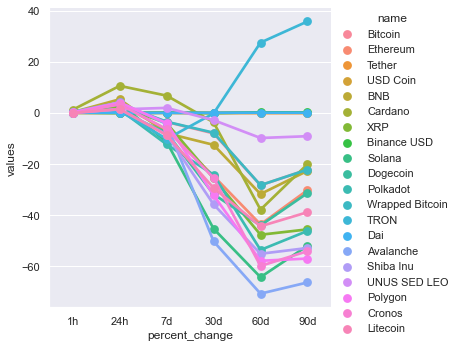

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')